In [1]:
import pandas as pd
import sqlite3

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import datetime

conn=sqlite3.connect("events/database/events.db")



In [7]:
events = pd.read_sql_query("SELECT * FROM events_table", conn)

events["event_date"]=events["event_date"].str.replace("-","").str.strip()
events["event_date"]=pd.to_datetime(events["event_date"], format='%Y.%m.%d. %H:%M')

events["longitude"]=events["longitude"].astype("float32")
events["latitude"]=events["latitude"].astype("float32")

In [8]:
events.head()

,event_id,event_date,categoryCode,categoryName,subCategoryCode,subCategoryName,title,subtitle,content,location,latitude,longitude,counties,districts,update_info,event_url
0,1289,2017-09-01 05:55:00,TRA,Közlekedési baleset,RAC,közúti baleset,Árokba csúszott egy teherautó a Jászberényi úton,Félpályán halad a forgalom az érintett szakaszon.,"A járdára futott, majd az árokba csúszott egy ...","Budapest, Jászberényi út",47.487797,19.176750,['BUD'],['BUD10'],[],https://www.katasztrofavedelem.hu/modules/vesz...
1,1290,2017-09-01 06:02:00,FIR,Tűzeset,OBF,melléképület-tűz,Egy használaton kívüli istálló ég Budajenőn,A tűzoltók két vízsugárral oltják a lángokat.,"Egy nyolcszáz négyzetméteres, használaton kívü...","Budajenő, Kossuth Lajos utca",47.561436,18.795195,['PST'],['PST2'],[],https://www.katasztrofavedelem.hu/modules/vesz...
2,1291,2017-09-01 06:25:00,TRA,Közlekedési baleset,RAC,közúti baleset,Baleset történt az M3-asnál Hatvan térségében,Több sérültje van a karambolnak.,Két gépkocsi ütközött az M3-as autópálya 54-es...,"Hatvan, 21",47.685635,19.664650,['HEV'],['HEV5'],[],https://www.katasztrofavedelem.hu/modules/vesz...
3,1292,2017-09-01 06:43:00,TRA,Közlekedési baleset,RAC,közúti baleset,Felborult és oszlopnak ütközött egy gépkocsi T...,A tűzoltók egy embert szabadítottak ki a jármű...,A tetejére borult és egy távközlési oszlopnak ...,"Tahitótfalu, Szentendrei út",47.742184,19.084946,['PST'],['PST14'],[],https://www.katasztrofavedelem.hu/modules/vesz...
4,1293,2017-09-01 08:03:00,FIR,Tűzeset,CBU,közösségi épület,Egy kiégett elektromos biztosíték okozott bajt...,"Százharminckét ember hagyta el az épületet, se...",A lift tetején elhelyezett elektromos biztosít...,"Siófok, Batthyány Lajos utca",46.908916,18.054476,['SOM'],['SOM7'],[],https://www.katasztrofavedelem.hu/modules/vesz...


In [9]:
split_categories=events["categoryName"].str.get_dummies(sep=',')
split_categories["event_date"]=events["event_date"]
split_categories.head()

,Egyéb esemény,Egyéb műszaki mentés,Iparbiztonsági esemény,Közlekedési baleset,Meteorológiai riasztás,Polgári Védelmi intézkedést kiváltó esemény,Rendkívüli esemény,Tűzeset,Útinform,event_date
0,0,0,0,1,0,0,0,0,0,2017-09-01 05:55:00
1,0,0,0,0,0,0,0,1,0,2017-09-01 06:02:00
2,0,0,0,1,0,0,0,0,0,2017-09-01 06:25:00
3,0,0,0,1,0,0,0,0,0,2017-09-01 06:43:00
4,0,0,0,0,0,0,0,1,0,2017-09-01 08:03:00


<AxesSubplot: xlabel='event_date'>

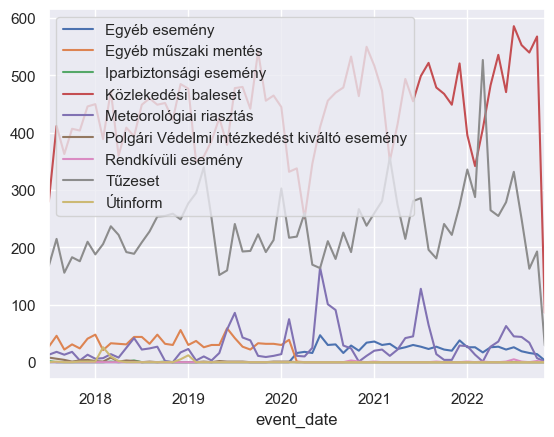

In [10]:
split_categories.resample("M", on="event_date").sum().plot()


<AxesSubplot: xlabel='longitude', ylabel='latitude'>

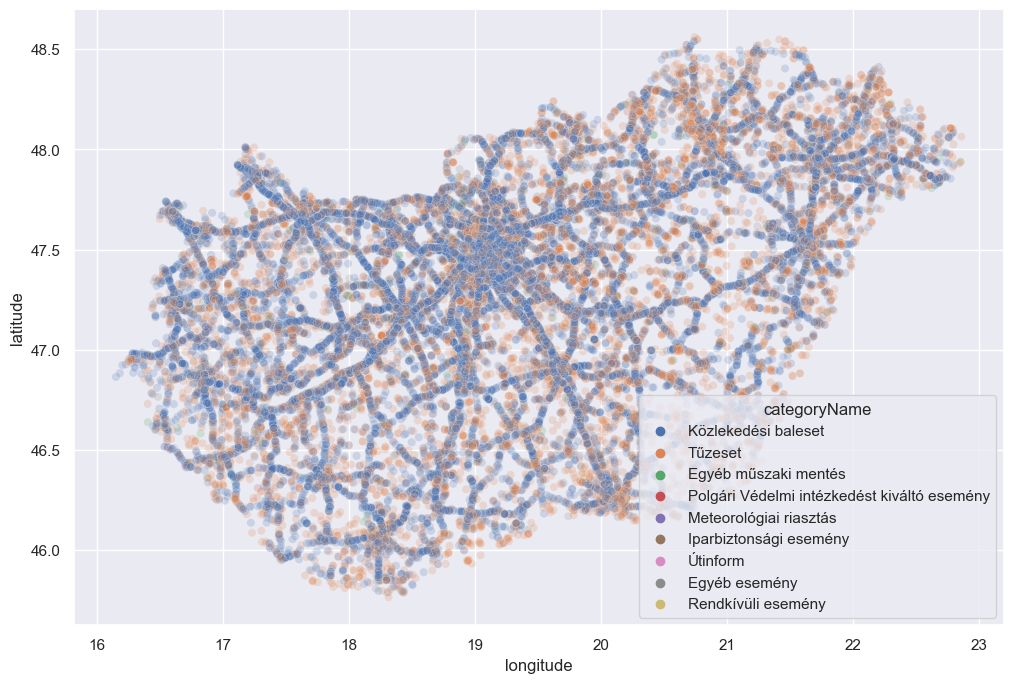

In [21]:
local_events=events[(events["longitude"]!=0) & (events["latitude"]!=0)]
plt.figure(figsize=(12,8))
sns.scatterplot(local_events, x="longitude" ,y="latitude", hue="categoryName", alpha=0.2)

In [14]:
events[events["longitude"]==0]

,event_id,event_date,categoryCode,categoryName,subCategoryCode,subCategoryName,title,subtitle,content,location,latitude,longitude,counties,districts,update_info,event_url
32,0,2017-09-03 05:02:00,WEA,Meteorológiai riasztás,,,Visszavonta a riasztásokat a meteorológiai szo...,Nincsenek veszélyes időjárási jelenségek hazán...,Az Országos Meteorológiai Szolgálat visszavont...,None,0.0,0.0,[''],['STW'],[],https://www.katasztrofavedelem.hu/modules/vesz...
39,0,2017-09-02 19:12:00,WEA,Meteorológiai riasztás,,,Visszavonta a heves zivatarok veszélye miatt k...,A felhőszakadásokra bizonyos területeken még s...,Az Országos Meteorológiai Szolgálat visszavont...,None,0.0,0.0,[''],['STW'],[],https://www.katasztrofavedelem.hu/modules/vesz...
121,0,2017-09-06 16:18:00,CPE,Polgári Védelmi intézkedést kiváltó esemény,USD,közműszolgáltatás zavara,Újra van víz Pomázon,Elhárították a hibát a szolgáltató szakemberei.,Helyreállították a vízszolgáltatást Pomázon. A...,None,0.0,0.0,['PST'],['PST14'],[],https://www.katasztrofavedelem.hu/modules/vesz...
195,1486,2017-09-11 14:13:00,WEA,Meteorológiai riasztás,,,Visszavonta a riasztásokat a meteorológiai szo...,Nincsenek veszélyes időjárási jelenségek hazán...,Az Országos Meteorológiai Szolgálat visszavont...,None,0.0,0.0,[''],['STW'],[],https://www.katasztrofavedelem.hu/modules/vesz...
206,1497,2017-09-11 23:15:00,OTR,Egyéb műszaki mentés,EDS,viharkárok felszámolása,Viharkárokhoz riasztották Csongrád megye tűzol...,Faágakat tört le a viharos szél.,Egy harminc centiméter átmérőjű faág hasadt le...,None,0.0,0.0,['CSO'],['CSO'],[],https://www.katasztrofavedelem.hu/modules/vesz...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47324,0,2022-08-30 18:49:00,WEA,Meteorológiai riasztás,,,Visszavonta a riasztásokat a meteorológiai szo...,Az Országos Meteorológiai Szolgálat visszavont...,"Elsőfokú, citromsárga riasztást adott ki zivat...",None,0.0,0.0,[''],['STW'],[],https://www.katasztrofavedelem.hu/modules/vesz...
47327,0,2022-08-30 17:30:00,WEA,Meteorológiai riasztás,,,Visszavonta a meteorológiai szolgálat a felhős...,Visszavonta az Országos Meteorológiai Szolgála...,"Elsőfokú, citromsárga riasztást adott ki felhő...",None,0.0,0.0,[''],['STW'],[],https://www.katasztrofavedelem.hu/modules/vesz...
47363,0,2022-08-31 17:22:00,WEA,Meteorológiai riasztás,,,Visszavonták a zivatarok kialakulásának veszél...,Az Országos Meteorológiai Szolgálat visszavont...,"Elsőfokú, citromsárga riasztást adott ki zivat...",None,0.0,0.0,[''],['STW'],[],https://www.katasztrofavedelem.hu/modules/vesz...
47366,0,2022-08-31 22:34:00,WEA,Meteorológiai riasztás,,,Visszavonták a zivatarok kialakulásának veszél...,Az Országos Meteorológiai Szolgálat visszavont...,"Elsőfokú, citromsárga riasztást adott ki zivat...",None,0.0,0.0,[''],['STW'],[],https://www.katasztrofavedelem.hu/modules/vesz...


In [26]:
events.groupby(["categoryName","subCategoryName"])["event_id"].count()

categoryName                                 subCategoryName                                        
Egyéb esemény                                                                                             813
Egyéb műszaki mentés                         egyéb műszaki mentés                                         120
                                             gázszivárgás                                                 218
                                             szén-monoxid-szivárgás                                       521
                                             sérült ember mentése                                          82
                                             viharkárok felszámolása                                      171
Iparbiztonsági esemény                       ipari baleset                                                  2
                                             közműszolgáltatás zavara                                       5
                   

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

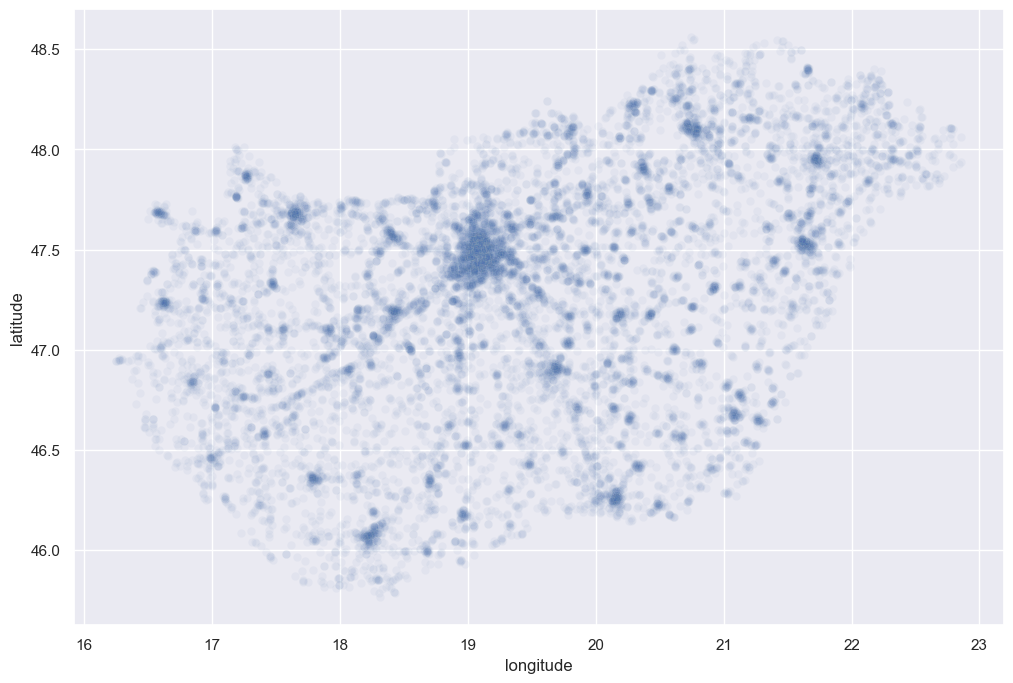

In [31]:
car_accident=events[(events["longitude"]!=0) & (events["latitude"]!=0) & (events["categoryName"]=="Tűzeset")]
plt.figure(figsize=(12,8))
sns.scatterplot(car_accident, x="longitude" ,y="latitude", alpha=0.05)

In [35]:
events[events.content.str.contains("villám") & events.latitude!=0]

,event_id,event_date,categoryCode,categoryName,subCategoryCode,subCategoryName,title,subtitle,content,location,latitude,longitude,counties,districts,update_info,event_url
721,727,2017-08-06 20:13:00,OTR,Egyéb műszaki mentés,EDS,viharkárok felszámolása,Fa hasadt ketté a viharban Budapesten,Tizenöt méter magas fa hasadt ketté Budapest 1...,A felderítés adatai szerint villám csapott a f...,"Budapest, Csokonai utca",47.459091,19.238043,['BUD'],['BUD17'],[],https://www.katasztrofavedelem.hu/modules/vesz...
1583,370,2017-07-24 18:03:00,FIR,Tűzeset,RBU,lakóépület,Villám csapott egy csömöri családi házba,A csapás az elektromos hálózatot is érintette.,"Villám csapott egy családi házba Csömörön, a F...","Csömör, Fekete István köz",47.554710,19.219599,['PST'],['PST7'],[],https://www.katasztrofavedelem.hu/modules/vesz...
1586,373,2017-07-24 19:28:00,OTR,Egyéb műszaki mentés,EDS,viharkárok felszámolása,Villám csapott egy daruszentmiklósi parasztház...,Ledőlt a kémény a villámcsapás után.,Villám csapott egy régi típusú parasztház kémé...,"Daruszentmiklós, Dániel utca",46.866608,18.861511,['FEJ'],['FEJ2'],[],https://www.katasztrofavedelem.hu/modules/vesz...
6986,10186,2018-07-22 18:21:00,FIR,Tűzeset,RBU,lakóépület,Villám csapott egy családi ház kéményébe Nemes...,Elsődleges információink szerint az eset során...,Villám csapott egy körülbelül százharminc négy...,"Nemesvámos, Nemesvámos",47.052753,17.874567,['VES'],['VES9'],[],https://www.katasztrofavedelem.hu/modules/vesz...
6992,0,2018-07-23 10:46:00,FIR,Tűzeset,RBU,lakóépület,Eloltották a budafoki házban keletkezett tüzet,Villám csapott az épület tetőszerkezetébe.,"Eloltották azt a tüzet, amely egy családi ház ...","Budapest, Ady Endre út",47.440277,19.024160,['BUD'],['BUD22'],[],https://www.katasztrofavedelem.hu/modules/vesz...
7342,9082,2018-06-08 04:57:00,FIR,Tűzeset,RBU,lakóépület,Villám csapott egy családi házba Nagykőrösön,"Az épület kigyulladt, a lángokat a tűzoltók ol...",Villám csapott egy körülbelül százharminc négy...,"Nagykőrös, Tüzér utca",47.029789,19.770210,['PST'],['PST11'],[],https://www.katasztrofavedelem.hu/modules/vesz...
8331,0,2018-05-23 09:13:00,FIR,Tűzeset,RBU,lakóépület,Villámcsapás okozhatta az ágasegyházi tanya tüzét,A tűzoltók egy gázpalackot is kihoztak az épül...,Feltételezhetően villámcsapás okozta az Ágaseg...,"Ágasegyháza, Sándortelep dűlő",46.799606,19.475010,['BAK'],['BAK5'],[],https://www.katasztrofavedelem.hu/modules/vesz...
8357,8750,2018-05-24 18:04:00,FIR,Tűzeset,RBU,lakóépület,Villám csapott egy családi házba Pilismaróton,Az épület tetőszerkezete kigyulladt.,Villám csapott egy családi ház tetőszerkezetéb...,"Pilismarót, Kölcsey Ferenc utca",47.779274,18.878098,['KOM'],['KOM1'],[],https://www.katasztrofavedelem.hu/modules/vesz...
8359,8752,2018-05-24 18:19:00,OTR,Egyéb műszaki mentés,EDS,viharkárok felszámolása,Leborította egy családi ház kéményét a villám ...,A lakóépület átmenetileg lakhatatlanná vált.,Villám csapott egy családi ház tetőszerkezetéb...,"Csépa, Zrínyi utca",46.803246,20.126076,['JSZ'],['JSZ5'],[],https://www.katasztrofavedelem.hu/modules/vesz...
9268,11177,2018-09-01 14:26:00,OTR,Egyéb műszaki mentés,EDS,viharkárok felszámolása,Villám csapott egy családi ház kéményébe Táplá...,Az épület tetőszerkezete megsérült az eset során.,Villám csapott egy családi ház kéményébe Táplá...,"Táplánszentkereszt, park utca",47.196449,16.715174,['VAS'],['VAS6'],[],https://www.katasztrofavedelem.hu/modules/vesz...


In [36]:
import cartopy.io.img_tiles as cimgt


: 

: 